# Putting it all together: Building a value-weighted index

This chapter combines the previous concepts by teaching you how to create a value-weighted index. This index uses market-cap data contained in the stock exchange listings to calculate weights and 2016 stock price information. Index performance is then compared against benchmarks to evaluate the performance of the index you created.

# Putting it all together: Building a value-weighted index

This chapter combines the previous concepts by teaching you how to create a value-weighted index. This index uses market-cap data contained in the stock exchange listings to calculate weights and 2016 stock price information. Index performance is then compared against benchmarks to evaluate the performance of the index you created.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [20]:
nyse = pd.read_excel('../stock_data/listings.xlsx',sheet_name='nyse', na_values='n/a')
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


/Users/diego.uchendu/Documents/2_Personal_Projects/6_ML_github/Machine_learning/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [21]:
nyse.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,"1,647,165,275.84",NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,"112,736,642,168.15",NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,"579,312,875.72","2,013.00",Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,"5,225,238,185.16","2,013.00",Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,"134,735,089.20",NaN,Consumer Services,Newspapers/Magazines


In [22]:
## Load and prepare listing data

nyse.set_index('Stock Symbol', inplace= True)
nyse.dropna(subset=['Sector'],inplace=True)
nyse['Market Capitalization'] /=1e6 # in Million USD

In [23]:
nyse.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,"1,647.17",NaN,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,"112,736.64",NaN,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,579.31,"2,013.00",Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,"5,225.24","2,013.00",Technology,"Computer Software: Programming, Data Processing"
AHC,A.H. Belo Corporation,6.20,134.74,NaN,Consumer Services,Newspapers/Magazines


In [24]:
#Select Index components
components = nyse.groupby(['Sector'])['Market Capitalization'].nlargest(1)
components.sort_values(ascending=False)

Sector                 Stock Symbol
Health Care            JNJ            338,834.39
Energy                 XOM            338,728.71
Finance                JPM            300,283.25
Miscellaneous          BABA           275,525.00
Public Utilities       T              247,339.52
Basic Industries       PG             230,159.64
Consumer Services      WMT            221,864.61
Consumer Non-Durables  KO             183,655.31
Technology             ORCL           181,046.10
Capital Goods          TM             155,660.25
Transportation         UPS             90,180.89
Consumer Durables      ABB             48,398.94
Name: Market Capitalization, dtype: float64

In [25]:
components

Sector                 Stock Symbol
Basic Industries       PG             230,159.64
Capital Goods          TM             155,660.25
Consumer Durables      ABB             48,398.94
Consumer Non-Durables  KO             183,655.31
Consumer Services      WMT            221,864.61
Energy                 XOM            338,728.71
Finance                JPM            300,283.25
Health Care            JNJ            338,834.39
Miscellaneous          BABA           275,525.00
Public Utilities       T              247,339.52
Technology             ORCL           181,046.10
Transportation         UPS             90,180.89
Name: Market Capitalization, dtype: float64

In [26]:
## Import & prepare listing data
tickers = components.index.get_level_values('Stock Symbol')
tickers

Index(['PG', 'TM', 'ABB', 'KO', 'WMT', 'XOM', 'JPM', 'JNJ', 'BABA', 'T',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')

In [27]:
tickers.tolist()

['PG',
 'TM',
 'ABB',
 'KO',
 'WMT',
 'XOM',
 'JPM',
 'JNJ',
 'BABA',
 'T',
 'ORCL',
 'UPS']

In [28]:
## Stock index components
columns = ['Company Name', 'Market Capitalization', 'Last Sale']
components_info = nyse.loc[tickers,columns]
pd.options.display.float_format = '{:,.2f}'.format

In [29]:
components_info

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
PG,Procter & Gamble Company (The),"230,159.64",90.03
TM,Toyota Motor Corp Ltd Ord,"155,660.25",104.18
ABB,ABB Ltd,"48,398.94",22.63
KO,Coca-Cola Company (The),"183,655.31",42.79
WMT,"Wal-Mart Stores, Inc.","221,864.61",73.15
XOM,Exxon Mobil Corporation,"338,728.71",81.69
JPM,J P Morgan Chase & Co,"300,283.25",84.40
JNJ,Johnson & Johnson,"338,834.39",124.99
BABA,Alibaba Group Holding Limited,"275,525.00",110.21


## Explore and clean company listing information

To get started with the construction of a market-value based index, you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

We have already imported `pandas` as `pd`, and loaded the `listings` data set with listings information from the NYSE, NASDAQ, and AMEX. The column `'Market Capitalization'` is already measured in USD mn.

In [30]:
listings_nyse = pd.read_excel('../stock_data/listings.xlsx', sheet_name='nyse', na_values='n/a')
listings_amex = pd.read_excel('../stock_data/listings.xlsx', sheet_name='amex', na_values='n/a')
listings_nasdaq = pd.read_excel('../stock_data/listings.xlsx', sheet_name='nasdaq', na_values='n/a')

/Users/diego.uchendu/Documents/2_Personal_Projects/6_ML_github/Machine_learning/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/diego.uchendu/Documents/2_Personal_Projects/6_ML_github/Machine_learning/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/diego.uchendu/Documents/2_Personal_Projects/6_ML_github/Machine_learning/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [31]:
listings_nyse['Exchange'] = 'nyse'
listings_amex['Exchange'] = 'amex'
listings_nasdaq['Exchange'] = 'nasdaq'

In [32]:
listings = pd.concat([listings_amex, listings_nasdaq, listings_nyse], axis=0)
listings.reset_index(inplace=True)
listings.drop(['index'], axis=1, inplace=True)
listings['Market Capitalization'] /= 1e6

In [33]:
listings.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,XXII,"22nd Century Group, Inc",1.33,120.63,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.00,"1,266.33","1,986.00",NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.15,139.87,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.22,67.56,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.36,128.84,NaN,NaN,NaN,amex


* Inspect `listings using `.info()`.
* Move the column `'Stock Symbol'` into the index (`inplace`).
* Drop all companies with missing `'Sector'` information from `listings`.
* Select companies with IPO Year before 2019.
* Inspect the result of the changes you just made using `.info()`.
* Show the number of companies per `'Sector'` using `.groupby()` and `.size()`. Sort the output in descending order.S

In [34]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 417.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2349 non-null   object 
 1   Last Sale              2349 non-null   float64
 2   

## Select and inspect index components

Now that you have imported and cleaned the `listings` data, you can proceed to select the `index` components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price

* Use `.groupby()` and `.nlargest()` to select the largest company by `'Market Capitalization'` for each `'Sector'`, and assign the result to `components`.
* Print `components`, sorted in descending order by market cap.
* Select `Stock Symbol` from the `index` of `components`, assign it to `tickers` and print the result.
* Create a list `info_cols` that holds the column names `Company Name`, `Market Capitalization`, and `Last Sale`. Next, use `.loc[]` with `tickers` and `info_cols` to `print()` more details about the listings sorted in descending order by `Market Capitalization`).

In [35]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

Sector                 Stock Symbol
Technology             AAPL           740,024.47
Consumer Services      AMZN           422,138.53
Miscellaneous          BABA           275,525.00
Health Care            AMGN           118,927.21
Transportation         UPS             90,180.89
Finance                GS              88,840.59
Consumer Non-Durables  ABEV            88,240.20
Basic Industries       RIO             70,431.48
Public Utilities       TEF             54,609.81
Capital Goods          GM              50,086.34
Energy                 PAA             22,223.00
Consumer Durables      CPRT            13,620.92
Name: Market Capitalization, dtype: float64


In [36]:
components.head()

Sector                 Stock Symbol
Basic Industries       RIO             70,431.48
Capital Goods          GM              50,086.34
Consumer Durables      CPRT            13,620.92
Consumer Non-Durables  ABEV            88,240.20
Consumer Services      AMZN           422,138.53
Name: Market Capitalization, dtype: float64

In [39]:
# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)


Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [40]:
# Print company name, market cap, and last price for each components
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers,info_cols].sort_values('Market Capitalization', ascending=False))

                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
AAPL                                  Apple Inc.             740,024.47   
AMZN                            Amazon.com, Inc.             422,138.53   
BABA               Alibaba Group Holding Limited             275,525.00   
AMGN                                  Amgen Inc.             118,927.21   
UPS                  United Parcel Service, Inc.              90,180.89   
GS               Goldman Sachs Group, Inc. (The)              88,840.59   
ABEV                                  Ambev S.A.              88,240.20   
RIO                                Rio Tinto Plc              70,431.48   
TEF                                Telefonica SA              54,609.81   
GM                        General Motors Company              50,086.34   
PAA           Plains All American Pipeline, L.P.              22,223.00   
CPRT                     

## Import index component price information

Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

In [43]:
tickers = tickers.tolist()

In [44]:
# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('../stock_data/stocks_4.csv', parse_dates=['Date'], index_col='Date')
stock_prices.info()

['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF', 'AAPL', 'UPS']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


In [46]:
# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)
price_return.head()

AAPL   278.87
AMGN   153.31
AMZN   460.02
CPRT   204.40
EL     215.16
dtype: float64

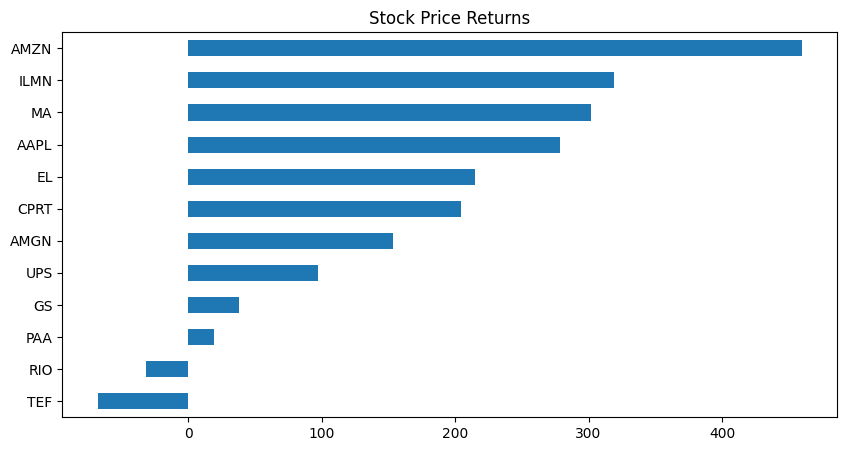

In [47]:
# Plot horizontal bar chart of sorted price_return
price_return.sort_values().plot(kind='barh', title='Stock Price Returns');

**Calculate number of shares outstanding**S

The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.

In [48]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings[['Market Capitalization', 'Last Sale']].loc[tickers]

# Print the first rows of components
print(components.head(5))

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2349 non-null   object 
 1   Last Sale              2349 non-null   float64
 2   Market Capitalization  2349 non-null   float64
 3   IPO Year               2349 non-null   float64
 4   Sector                 2349 non-null   object 
 5   Industry               2349 non-null   object 
 6   Exchange               2349 non-null   object 
dtypes: float64(3), object(4)
memory usage: 211.4+ KB
None
['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF', 'AAPL', 'UPS']
              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                       70,431.48      38.94
GM                        50,086.34      33.39
CPRT                      13,620.92      29.65
ABEV                      88,240.20       5.62
